# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Sierra-Leone"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Sierra Leone</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = './Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

### Import necessary libraries

In [2]:
# Write your answer here
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import re

### Extract file paths and names from directory

In [5]:
file_list = []
for path, subdirs, files in os.walk(DATA_FOLDER + "ebola/"):
    for name in files:
        if(name.split(".")[-1]) == "csv":
            file_list.append(os.path.join(path, name))

file_list[:10]

['./Data/ebola/liberia_data/2014-09-26-v134.csv',
 './Data/ebola/liberia_data/2014-10-18-v156.csv',
 './Data/ebola/liberia_data/2014-10-09-v147.csv',
 './Data/ebola/liberia_data/2014-07-17.csv',
 './Data/ebola/liberia_data/2014-09-17-v125.csv',
 './Data/ebola/liberia_data/2014-06-24.csv',
 './Data/ebola/liberia_data/2014-08-18.csv',
 './Data/ebola/liberia_data/2014-10-07-v145.csv',
 './Data/ebola/liberia_data/2014-12-06.csv',
 './Data/ebola/liberia_data/2014-09-11.csv']

#### Additional function to filter attributes by words

In [6]:
def column_filter(data_frame, country = 'liberia'):
    mylist = data_frame.columns.values
    if country == 'liberia':
        r = re.compile(".*(([D|d]eath)|([C|c]ase)).*")
    elif country == 'sl':
        r = re.compile(".*([N|n]ew).*")
    elif country == 'guinea':
        r = re.compile(".*([N|n]ew).*")
    newlist = list(filter(r.match, mylist))
    data_frame = data_frame[newlist]
    newlist = [" ".join(name.replace('\n ','').replace('/s', 's').replace('_', ' ').split()) for name in newlist[:]]
    data_frame.columns = newlist
    return data_frame

### Function to read Liberia files

In [7]:
def read_data_liberia(file_list, columns):
    df = pd.DataFrame()
    for file in file_list:
        temp = pd.read_csv(file)
        country, date = (file.split("/")[3][:-5], file.split("/")[4][:10])
        temp = temp.loc[temp['Variable'].isin(columns)]
        temp = temp[['Variable', 'National']]
        temp = temp.set_index('Variable')
        temp = temp.T
        temp['Date'] = pd.to_datetime(date)
        temp['Country'] = country
        temp = temp.set_index('Date')
        #temp = column_filter(temp, country = country)
        df = pd.concat([df, temp])
    df = df.sort_index()
        
    return df

##### Read files concerning Liberia cases

In [8]:
new_cases_deaths_liberia = ['New Case/s (Probable)', 'New Case/s (Suspected)',
       'New case/s (confirmed)',
       'Newly Reported Cases in HCW', 'Newly Reported deaths in HCW',
       'Newly reported deaths']

In [9]:
liberia = read_data_liberia([file for file in file_list if file.split("/")[3][:-5] == 'liberia'], new_cases_deaths_liberia) #and file != './Data/ebola/liberia_data/2014-10-04-v142.csv'])

In [10]:
liberia = liberia.sort_index()
liberia

,Country,New Case/s (Probable),New Case/s (Suspected),New case/s (confirmed),Newly Reported Cases in HCW,Newly Reported deaths in HCW,Newly reported deaths
Date,,,,,,,
2014-06-16,liberia,1.0,2.0,1.0,0.0,0.0,2.0
2014-06-17,liberia,0.0,2.0,0.0,0.0,0.0,0.0
2014-06-22,liberia,0.0,5.0,5.0,4.0,0.0,4.0
2014-06-24,liberia,0.0,2.0,4.0,0.0,0.0,4.0
2014-06-25,liberia,1.0,4.0,2.0,2.0,1.0,3.0
2014-06-28,liberia,6.0,2.0,1.0,1.0,0.0,1.0
2014-06-29,liberia,0.0,0.0,2.0,1.0,0.0,0.0
2014-07-01,liberia,0.0,2.0,2.0,0.0,1.0,5.0
2014-07-02,liberia,3.0,1.0,0.0,0.0,0.0,5.0


In [11]:
#liberia = liberia.reset_index()
#liberia

In [12]:
#liberia.loc[94:100, ['New Case/s (Probable)', 'New Case/s (Suspected)',
#       'New case/s (confirmed)']] - liberia.loc[94, ['New Case/s (Probable)', 'New Case/s (Suspected)',
#       'New case/s (confirmed)']]

In [13]:
#list, dates = zip(*liberia.index.tolist())
#dates = np.array(dates)

In [14]:
liberia['New cases'] = liberia[['New Case/s (Probable)', 'New Case/s (Suspected)',
       'New case/s (confirmed)', 'Newly Reported Cases in HCW']].sum(axis = 1)

In [15]:
liberia['New deaths'] = liberia[['Newly Reported deaths in HCW',
                                 'Newly reported deaths']].sum(axis = 1)

In [16]:
liberia = liberia[['Country', 'New cases', 'New deaths']]

In [17]:
#liberia = liberia.reset_index()
#liberia = liberia.set_index(['Date'])

Showing that file has duplicated columns with different values inserted

In [18]:
liberia.groupby(liberia.index.month).sum()

,New cases,New deaths
Date,,
6,48.0,15.0
7,101.0,53.0
8,343.0,219.0
9,1566.0,880.0
10,1157.0,702.0
11,402.0,202.0
12,46608.0,0.0


In [19]:
liberia.groupby([liberia.index.month, 'Country']).sum()#.divide(np.array(last_days - first_days + 1), axis = 0)

,,New cases,New deaths
Date,Country,,
6,liberia,48.0,15.0
7,liberia,101.0,53.0
8,liberia,343.0,219.0
9,liberia,1566.0,880.0
10,liberia,1157.0,702.0
11,liberia,402.0,202.0
12,liberia,46608.0,0.0


In [20]:
def number_of_days(df):
    first_days = [np.append([], df.index.day[0])]
    last_days = []
    last = 0
    for x in np.array(df.index.day):
        if x < last:
            first_days = np.append(first_days, x)
            last_days = np.append(last_days, last)
        last = x
    last_days = np.append(last_days, df.index.day[-1])
    
    return(last_days - first_days + 1) 


In [22]:
print(number_of_days(liberia))

[ 14.  26.  27.  30.  31.  29.   9.]


As there is a lot of incomplete data we will focus only on National attribute of deaths and new cases. Sometimes there are informations about these facts only from a few cities, but there is lack of information about national scale. In such situation we are not taking into account that informations, because we do not want to infer informations about country on the basis of only few cities.

# Sierra Leone

In [29]:
new_cases_deaths_sl = ['etc_new_admission', 'etc_new_deaths','new_confirmed', 
                       'new_noncase', 'new_probable', 'new_suspected', 
                       'death_suspected', 'death_probable','death_confirmed']

In [30]:
def read_data_sl(file_list, columns):
    df = pd.DataFrame()
    for file in file_list:
        temp = pd.read_csv(file, na_values='-')
        country, date = (file.split("/")[3][:-5], file.split("/")[4][:10])
        temp = temp.loc[temp['variable'].isin(columns)]
        temp[temp.columns.values[2:]] = temp[temp.columns.values[2:]].apply(pd.to_numeric)
        temp.loc[temp['National'].isnull(), 'National'] = temp.sum(axis = 1)
        temp = temp[['variable', 'National']]
        temp = temp.set_index('variable')
        temp = temp.T
        temp['Date'] = pd.to_datetime(date)
        temp['Country'] = country
        temp = temp.set_index('Date')
        df = pd.concat([df, temp])
    df = df.sort_index()
        
    return df

In [31]:
sl = read_data_sl([file for file in file_list if file.split("/")[3][:-5] == 'sl'], columns = new_cases_deaths_sl)
sl

variable,new_noncase,new_suspected,new_probable,new_confirmed,death_suspected,death_probable,death_confirmed,etc_new_admission,etc_new_deaths,Country
Date,,,,,,,,,,
2014-08-12,4.0,10.0,1.0,11.0,5.0,34.0,264.0,23.0,8.0,sl
2014-08-13,13.0,3.0,1.0,15.0,5.0,34.0,273.0,13.0,6.0,sl
2014-08-14,26.0,0.0,2.0,13.0,5.0,34.0,280.0,5.0,7.0,sl
2014-08-15,15.0,6.0,1.0,10.0,5.0,34.0,287.0,6.0,7.0,sl
2014-08-16,9.0,3.0,0.0,18.0,5.0,34.0,297.0,12.0,10.0,sl
2014-08-17,13.0,1.0,0.0,2.0,5.0,34.0,305.0,2.0,8.0,sl
2014-08-18,0.0,40.0,15.0,5.0,5.0,34.0,312.0,2.0,7.0,sl
2014-08-19,18.0,16.0,3.0,9.0,5.0,34.0,320.0,9.0,6.0,sl
2014-08-20,4.0,1.0,0.0,4.0,5.0,34.0,322.0,4.0,2.0,sl


In [32]:
sl['death_probable'] = sl['death_probable'].replace(to_replace=0, method='ffill')
sl['death_suspected'] = sl['death_suspected'].replace(to_replace=0, method='ffill')
sl['death_confirmed'] = sl['death_confirmed'].replace(to_replace=0, method='ffill')
sl['Deaths'] = sl[['death_confirmed', 'death_probable', 'death_suspected']].sum(axis = 1)
(sl['Deaths'].values[1:] - sl['Deaths'].values[:-1]).astype(int)

array([  9,   7,   7,  10,   8,   7,   8,   2,  10,   4,   6,   5,  14,
        11,   9,   5,   6,   4,   0,   9,   3,   5,   9,  13,   2,   5,
         3,   9,   5,   9,   4,   5,   6,   9,   6,   6,   2,   4,   1,
         4,   3,   0,   4,   0,   5,   4,   5,  23, -18,   6, 245,  45,
         4,   5,   5, 266,  17,  10,  15,   2,  16,   4,   7,  19,  13,
        11,   4,   7,  18,  42,  42,   4,  32,   3,   7,   6,   7,   8,
        29,  12,   7,  16,  20,  11,   0,  26,  17,   0,  17,   0,  43,
        21,  30,  31,  33,  84,  15,  53,  99,  21,  39,   0])

In [374]:
sl

variable,new_noncase,new_suspected,new_probable,new_confirmed,death_suspected,death_probable,death_confirmed,etc_new_admission,etc_new_deaths,Country,Deaths
Date,,,,,,,,,,,
2014-08-12,4.0,10.0,1.0,11.0,5.0,34.0,264.0,23.0,8.0,sl,303.0
2014-08-13,13.0,3.0,1.0,15.0,5.0,34.0,273.0,13.0,6.0,sl,312.0
2014-08-14,26.0,0.0,2.0,13.0,5.0,34.0,280.0,5.0,7.0,sl,319.0
2014-08-15,15.0,6.0,1.0,10.0,5.0,34.0,287.0,6.0,7.0,sl,326.0
2014-08-16,9.0,3.0,0.0,18.0,5.0,34.0,297.0,12.0,10.0,sl,336.0
2014-08-17,13.0,1.0,0.0,2.0,5.0,34.0,305.0,2.0,8.0,sl,344.0
2014-08-18,0.0,40.0,15.0,5.0,5.0,34.0,312.0,2.0,7.0,sl,351.0
2014-08-19,18.0,16.0,3.0,9.0,5.0,34.0,320.0,9.0,6.0,sl,359.0
2014-08-20,4.0,1.0,0.0,4.0,5.0,34.0,322.0,4.0,2.0,sl,361.0


In [33]:
negatives = (sl['Deaths'].values[1:] - sl['Deaths'].values[:-1]).astype(int) < 0
negatives

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

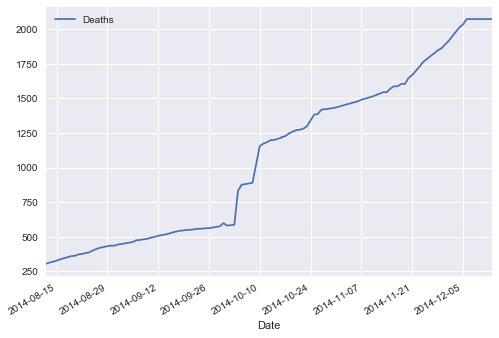

In [35]:
sl.plot(y = 'Deaths')

In [36]:
indicies_negatives = np.array([i for i, x in enumerate(negatives) if x])
indicies_negatives

array([48])

In [37]:
sl.iloc[indicies_negatives-1]['Deaths'].values

array([ 575.])

In [64]:
sl.iloc[(indicies_negatives)]['Deaths'].values

array([ 578.])

In [39]:
sl.iloc[(indicies_negatives+1)]['Deaths'].values

array([ 580.])

In [63]:
sl.loc[negatives, 'Deaths'] = np.round((sl.iloc[(indicies_negatives+1)]['Deaths'].values + sl.iloc[(indicies_negatives-1)]['Deaths'].values)/2)

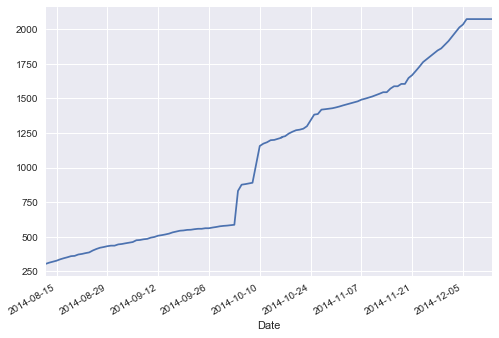

In [65]:
sl['Deaths'].plot()

In [66]:
sl['New deaths'] = np.append(sl['etc_new_deaths'].values[0], (sl['Deaths'].values[1:] - sl['Deaths'].values[:-1]).astype(int))

In [67]:
sl['New cases'] = sl[['new_suspected', 'new_probable', 'new_confirmed']].sum(axis=1)

In [68]:
sl = sl[['New cases', 'New deaths', 'Country']]

## Guinea

In [69]:
guinea_new_case_deaths = ['Total new cases registered so far', 'New deaths registered today', 'New deaths registered']

In [70]:
tmp = pd.read_csv('./Data/ebola/guinea_data/2014-08-04.csv')
np.array(tmp['Description'])

array(['New cases of suspects', 'New cases of probables',
       'New cases of confirmed', 'Total new cases registered so far',
       'Total cases of suspects', 'Total cases of probables',
       'Total cases of confirmed',
       'Cumulative (confirmed + probable + suspects)',
       'New deaths registered today',
       'New deaths registered today (confirmed)',
       'New deaths registered today (probables)',
       'New deaths registered today (suspects)',
       'Total deaths of suspects', 'Total deaths of probables',
       'Total deaths of confirmed',
       'Total deaths (confirmed + probables + suspects)',
       'Total PEC center today', 'Total PEC center today (confirmed)',
       'Total PEC center today (probables)',
       'Total PEC center today (suspects)',
       'Total of deaths in confirmed cases in CTE',
       'Total of cured in confirmed cases in CTE',
       'Number of male confirmed cases',
       'Number of female confirmed cases',
       'Number of male proba

In [71]:
def read_data_guinea(file_list, columns):
    df = pd.DataFrame()
    for file in file_list:
        temp = pd.read_csv(file)
        country, date = (file.split("/")[3][:-5], file.split("/")[4][:10])
        temp = temp.loc[temp['Description'].isin(columns)]
        temp = temp[['Description', 'Totals']]
        temp = temp.set_index('Description')
        temp = temp.T
        temp['Date'] = pd.to_datetime(date)
        temp['Country'] = country
        temp = temp.set_index('Date')
        #temp = column_filter(temp, country = country)
        df = pd.concat([df, temp])
    df = df.sort_index()
        
    return df

In [72]:
guinea = read_data_guinea([file for file in file_list if file.split("/")[3][:-5] == 'guinea'], guinea_new_case_deaths)
guinea.head()

,Country,New deaths registered,New deaths registered today,Total new cases registered so far
Date,,,,
2014-08-04,guinea,NaN,2.0,9
2014-08-26,guinea,5,NaN,28
2014-08-27,guinea,2,NaN,22
2014-08-30,guinea,5,NaN,24
2014-08-31,guinea,3,NaN,46


In [73]:
guinea[guinea_new_case_deaths] = guinea[guinea_new_case_deaths].apply(pd.to_numeric)

In [74]:
guinea['New deaths'] = guinea[['New deaths registered today', 'New deaths registered']].sum(axis = 1)
guinea.columns = ['Country', 'New deaths registered', 'New deaths registered today', 'New cases', 'New deaths']
guinea = guinea[['New cases', 'New deaths', 'Country']]
guinea

,New cases,New deaths,Country
Date,,,
2014-08-04,9,2.0,guinea
2014-08-26,28,5.0,guinea
2014-08-27,22,2.0,guinea
2014-08-30,24,5.0,guinea
2014-08-31,46,3.0,guinea
2014-09-02,25,5.0,guinea
2014-09-04,30,5.0,guinea
2014-09-07,16,4.0,guinea
2014-09-08,16,4.0,guinea


## Merge all DataFrames

In [88]:
total = pd.concat([sl, liberia, guinea])

In [89]:
total.index

DatetimeIndex(['2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15',
               '2014-08-16', '2014-08-17', '2014-08-18', '2014-08-19',
               '2014-08-20', '2014-08-21',
               ...
               '2014-09-16', '2014-09-17', '2014-09-19', '2014-09-21',
               '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-26',
               '2014-09-30', '2014-10-01'],
              dtype='datetime64[ns]', name='Date', length=225, freq=None)

In [92]:
total['colDateToSort'] = total.index
total = total.sort_values(['Country', 'colDateToSort'])
total = total.drop('colDateToSort', axis=1)
total

,Country,New cases,New deaths
Date,,,
2014-08-04,guinea,9.0,2.0
2014-08-26,guinea,28.0,5.0
2014-08-27,guinea,22.0,2.0
2014-08-30,guinea,24.0,5.0
2014-08-31,guinea,46.0,3.0
2014-09-02,guinea,25.0,5.0
2014-09-04,guinea,30.0,5.0
2014-09-07,guinea,16.0,4.0
2014-09-08,guinea,16.0,4.0


In [106]:
days_in_each_month = np.concatenate((number_of_days(guinea), number_of_days(liberia), number_of_days(sl)))
days_in_each_month

array([ 28.,  29.,   1.,  14.,  26.,  27.,  30.,  31.,  29.,   9.,  20.,
        30.,  31.,  29.,  13.])

In [107]:
total.groupby([total.index.month, 'Country']).sum().reset_index().set_index(['Country', 'Date']).sort_index()

New cases  New deaths
Country Date                       
guinea  8         129.0        17.0
        9         314.0        57.0
        10         34.0        15.0
liberia 6          48.0        15.0
        7         101.0        53.0
        8         343.0       219.0
        9        1566.0       880.0
        10       1157.0       702.0
        11        402.0       202.0
        12      46608.0         0.0
sl      8         533.0       140.0
        9        1242.0       143.0
        10       1986.0       857.0
        11       1580.0       427.0
        12        205.0       212.0

In [108]:
total.groupby([total.index.month, 'Country']).sum().reset_index().set_index(['Country', 'Date']).sort_index().divide(days_in_each_month, axis = 0)

New cases  New deaths
Country Date                         
guinea  8        4.607143    0.607143
        9       10.827586    1.965517
        10      34.000000   15.000000
liberia 6        3.428571    1.071429
        7        3.884615    2.038462
        8       12.703704    8.111111
        9       52.200000   29.333333
        10      37.322581   22.645161
        11      13.862069    6.965517
        12    5178.666667    0.000000
sl      8       26.650000    7.000000
        9       41.400000    4.766667
        10      64.064516   27.645161
        11      54.482759   14.724138
        12      15.769231   16.307692

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here